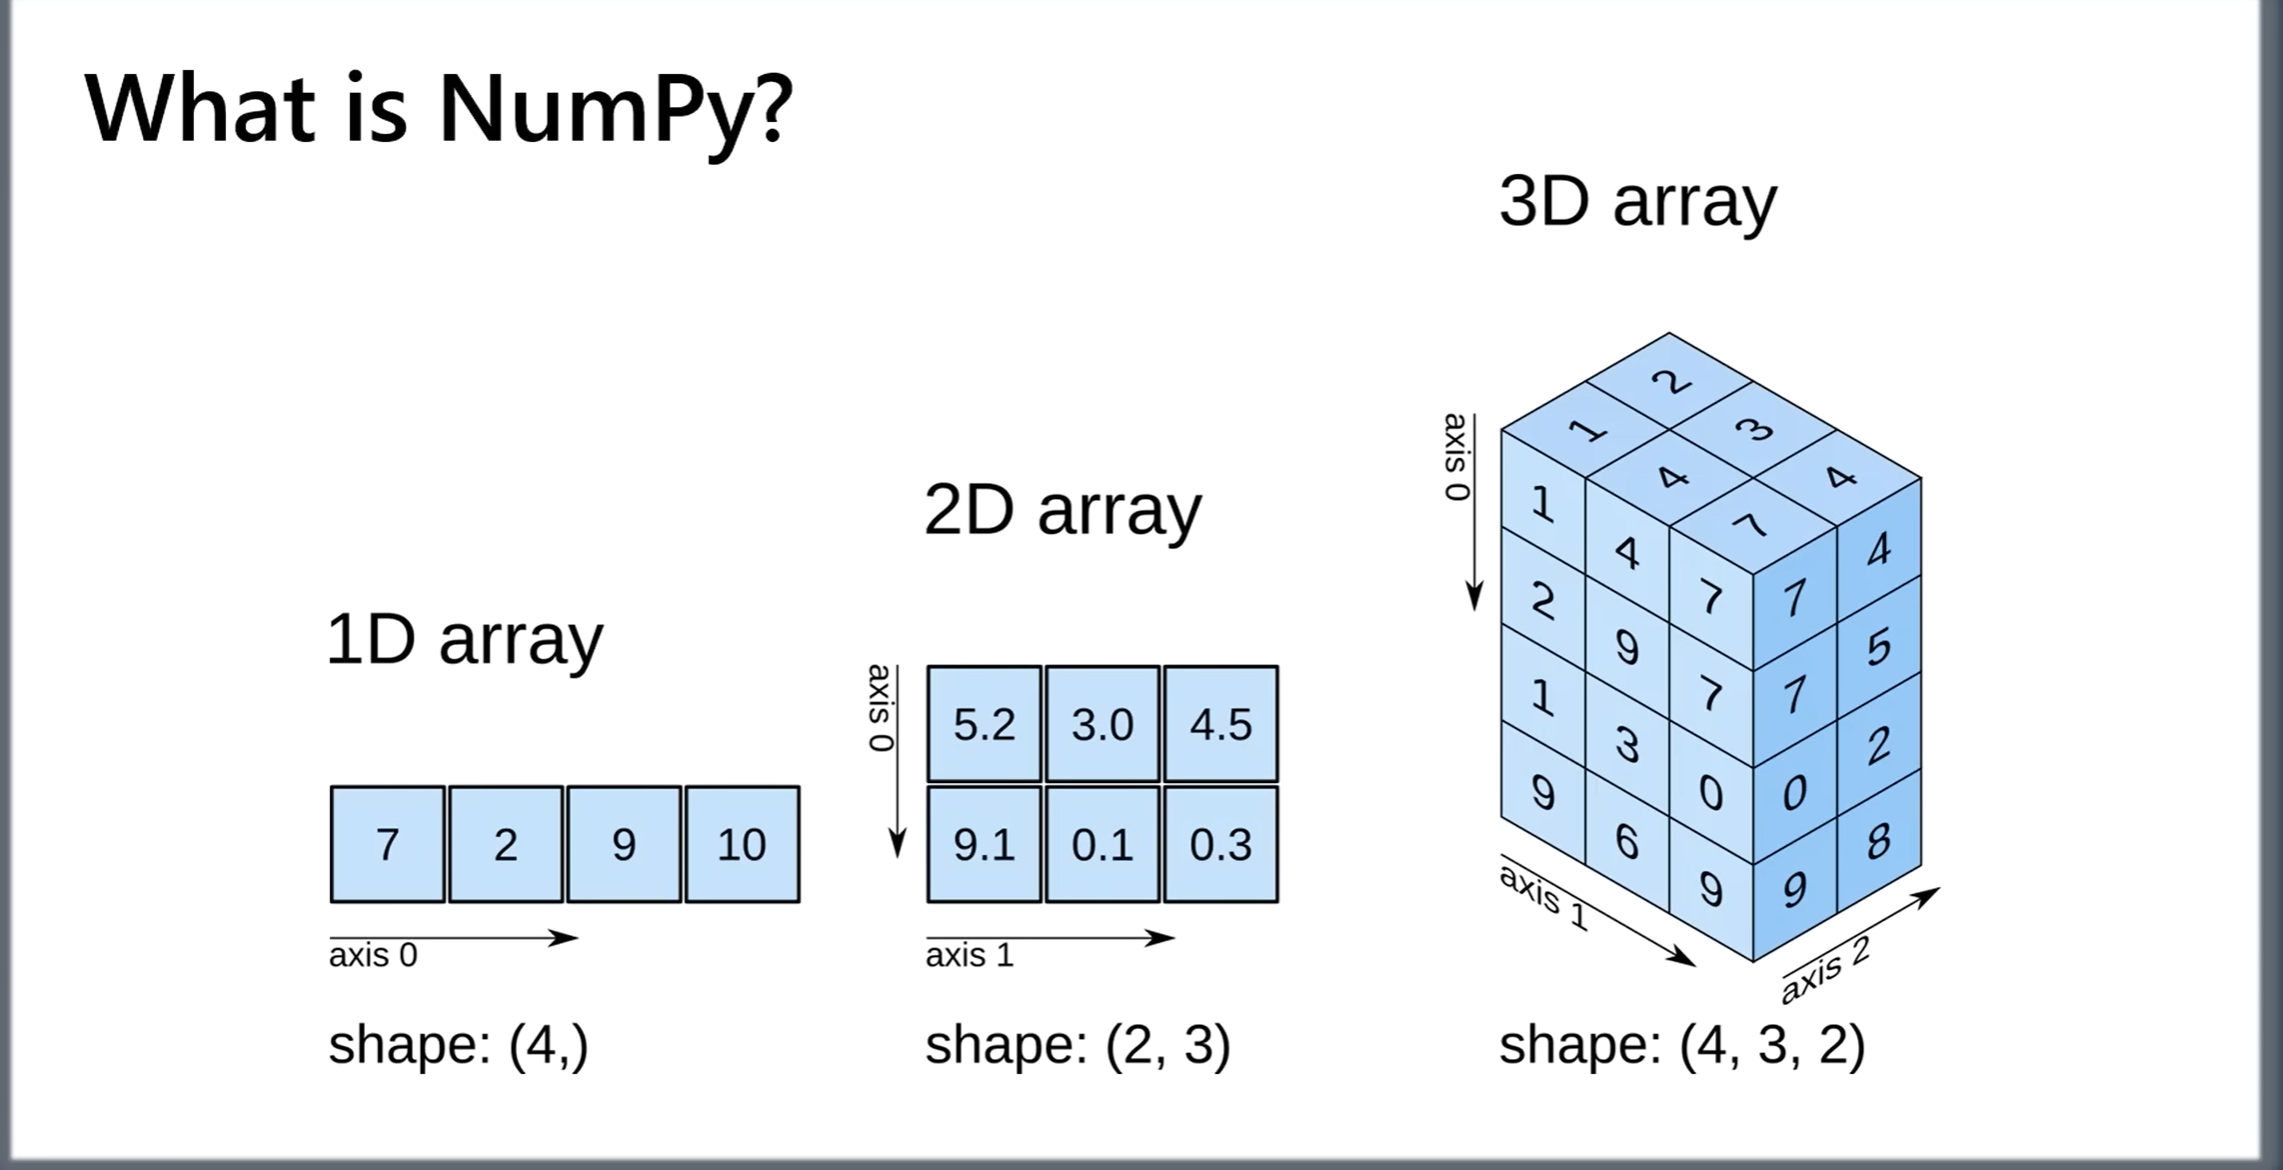

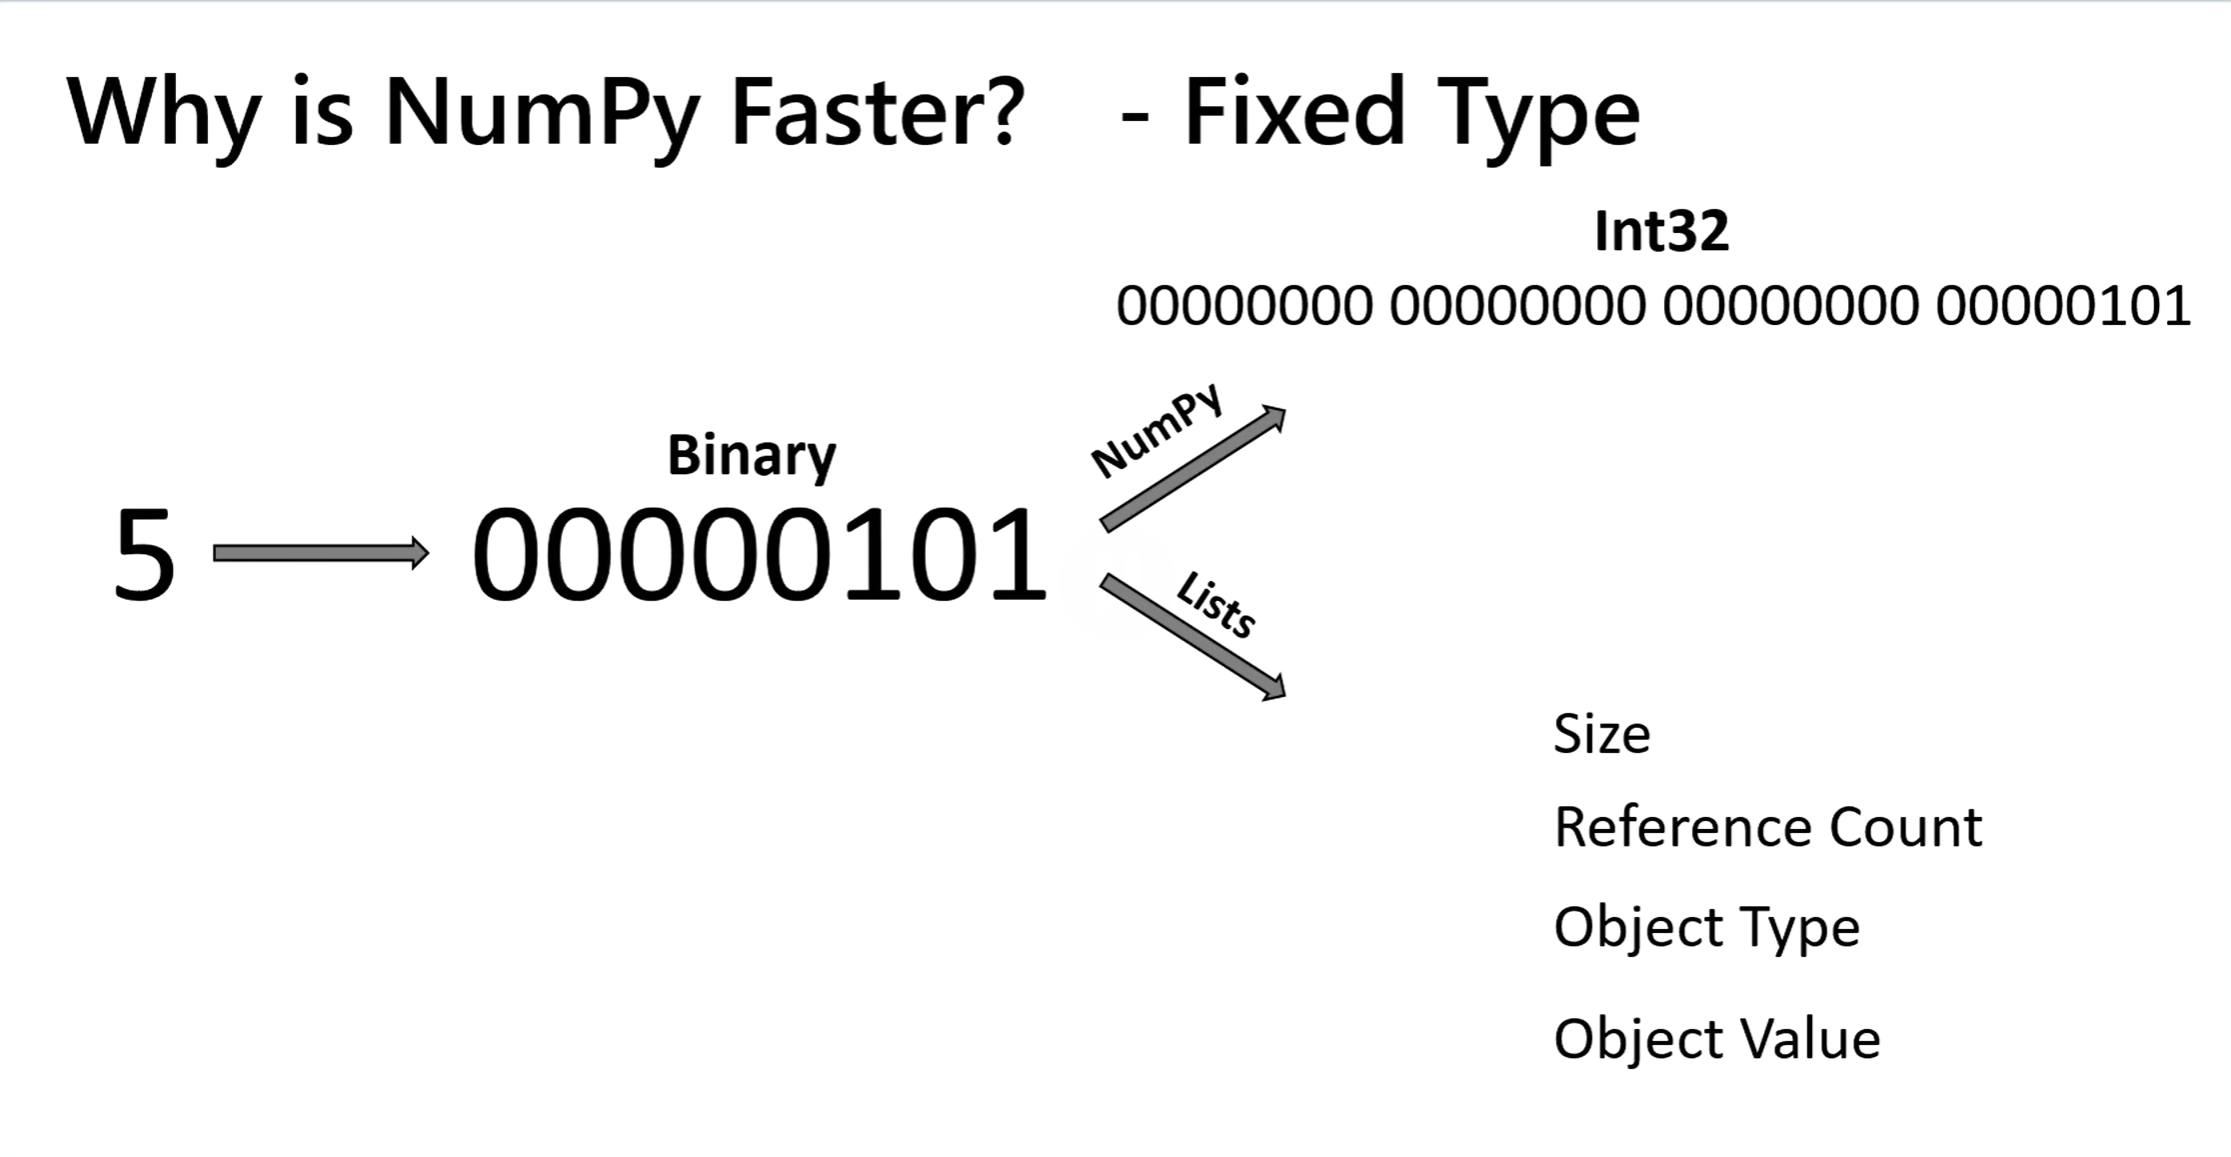

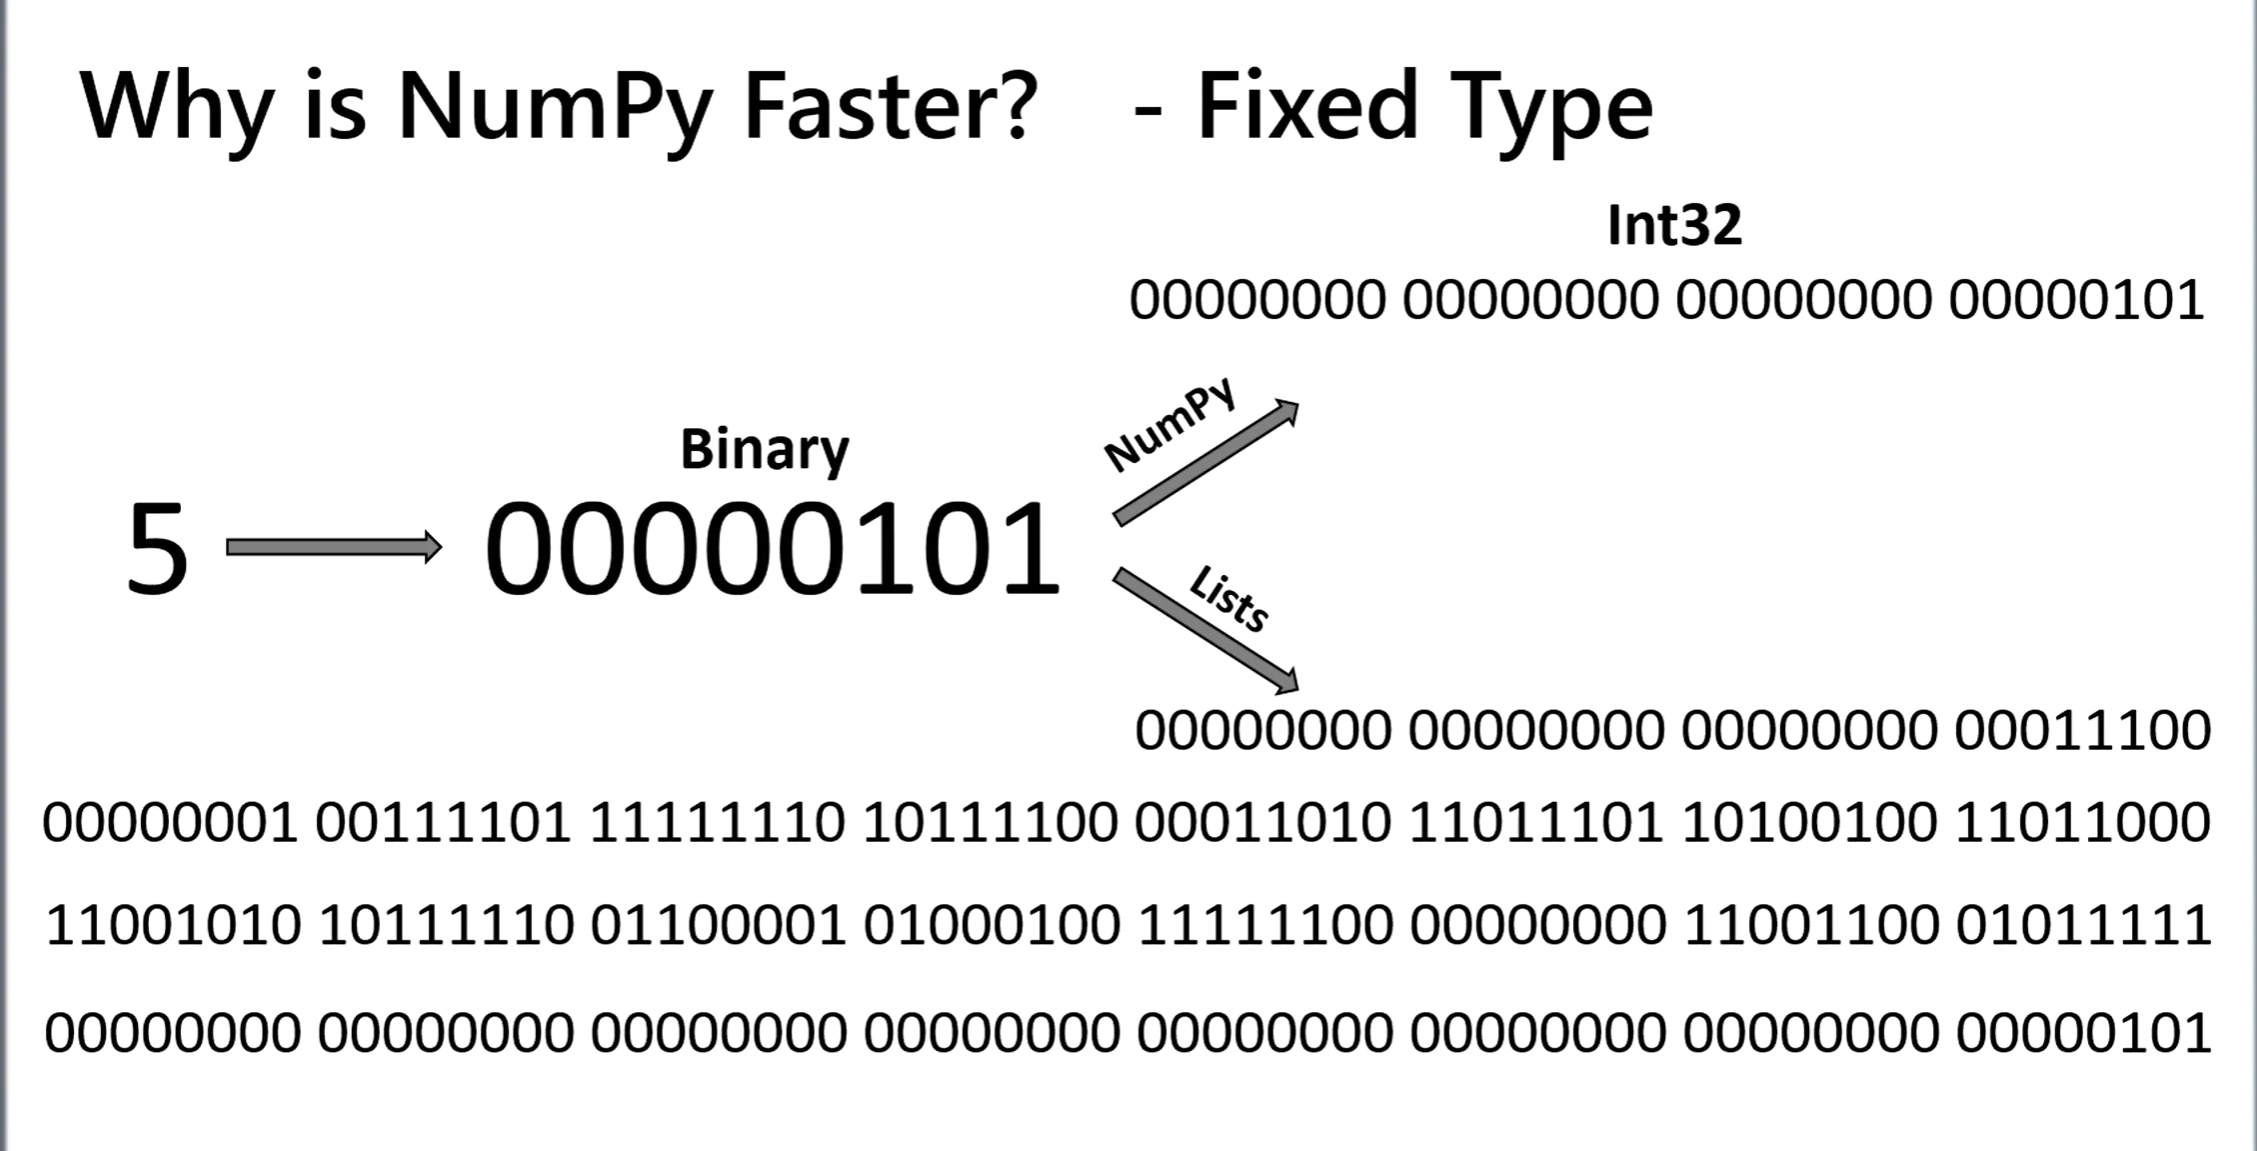

Why is NumPy Faster? - Fixed Type

. Faster to read less bytes of memory

· No type checking when iterating through objects

Python List: A Python list is essentially an array of pointers (references) to objects. The list doesn't store the data directly; it stores the address of the data.

Index 0 points to an Integer object.

Index 1 points to a String object.

Index 2 points to a Float object.

Because it just stores pointers, Python doesn't care what type of object is at the other end of the pointer.

Note: While you can do this, in Data Analytics (NumPy/Pandas), we generally avoid it because it kills performance. NumPy arrays enforce a single data type (like C++) to ensure calculations are fast.

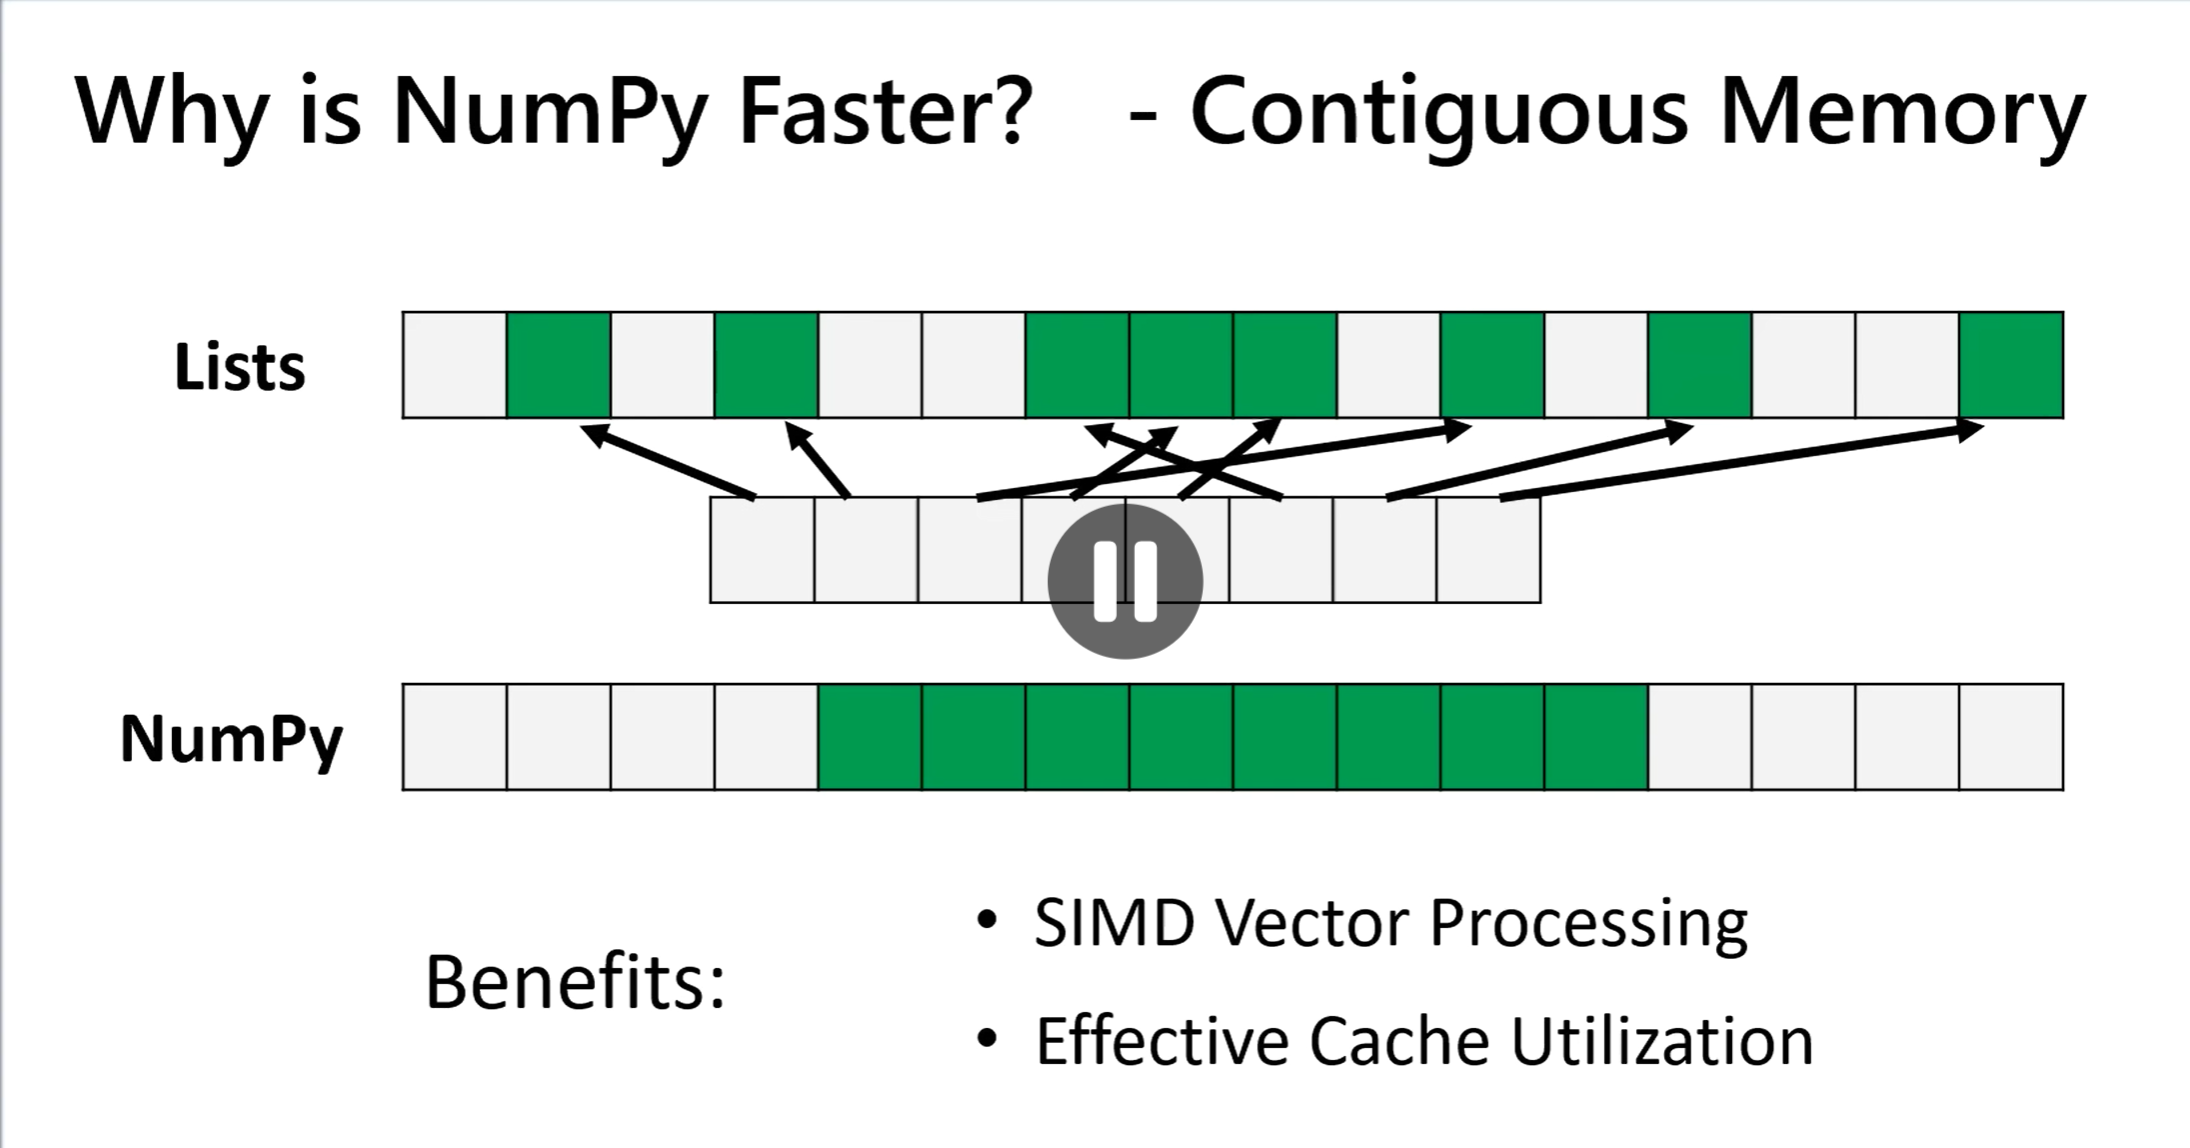

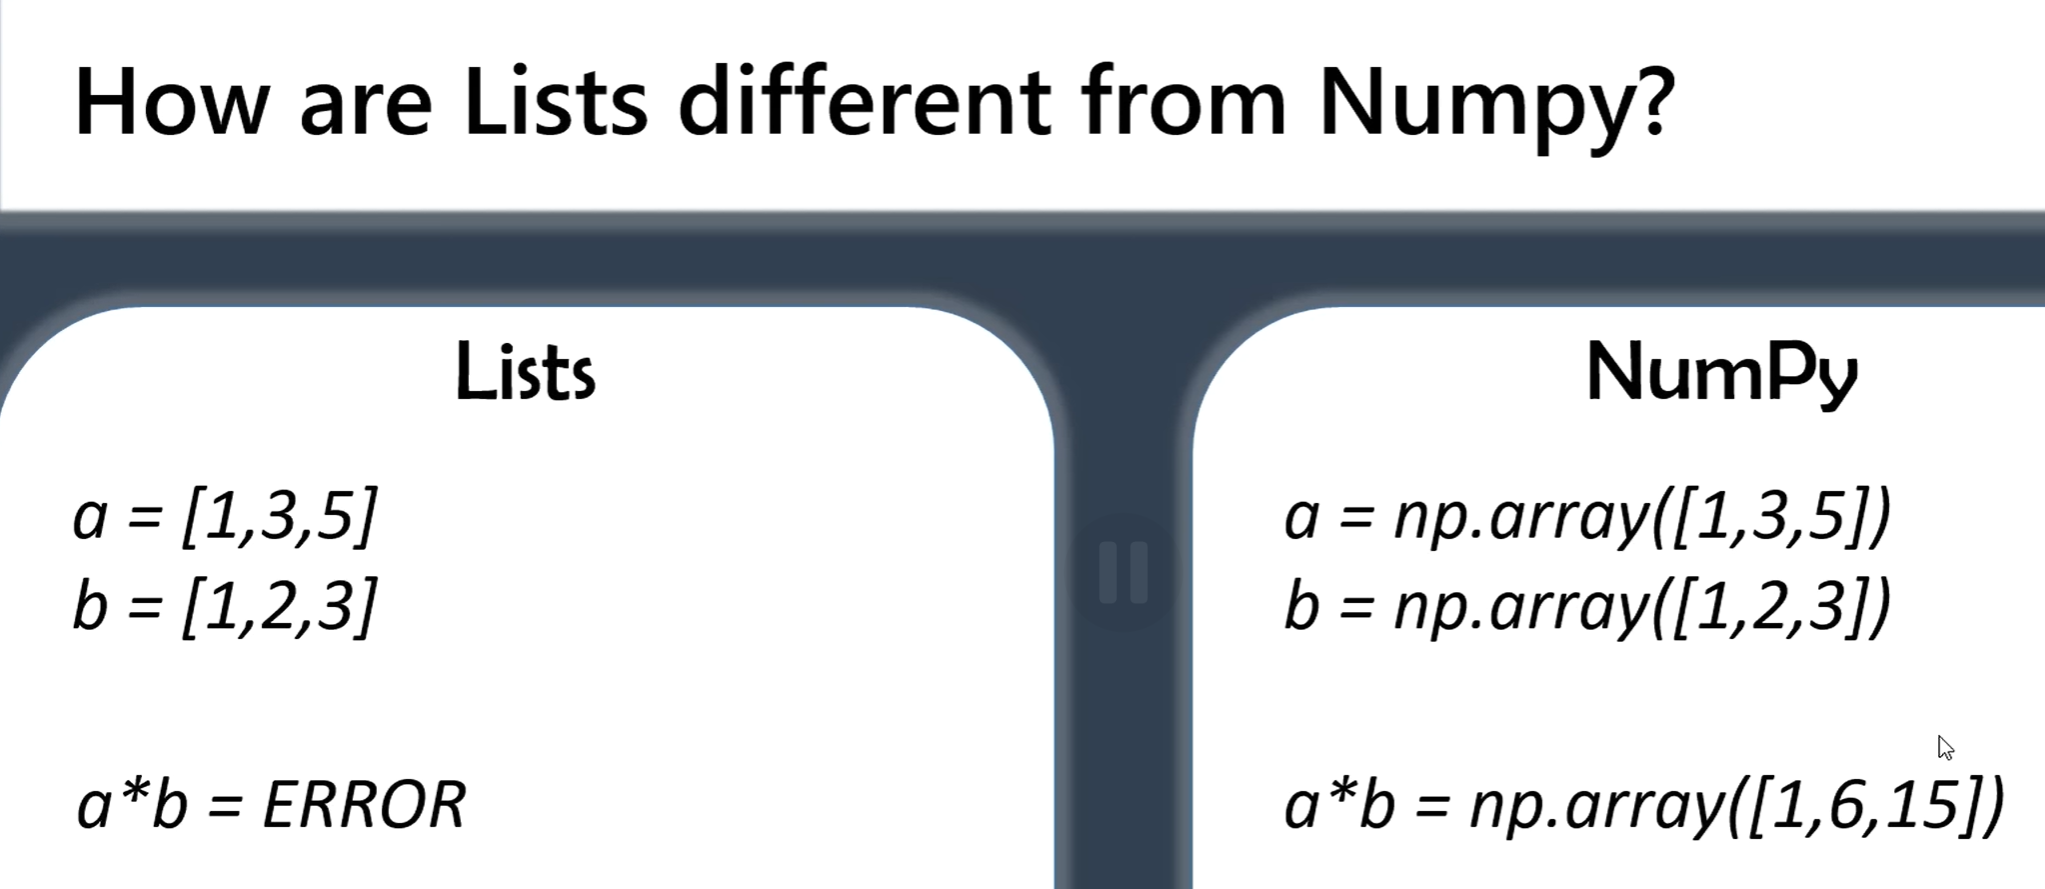

In [1]:
import random

salary_list = [random.randint(50000, 1000000) for _ in range( 1_000_000)]

In [2]:
import statistics as st

In [3]:
%%timeit

st.mean(salary_list)

179 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
import numpy as np

In [5]:
%%timeit
np.mean(salary_list)

32.1 ms ± 2.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
job_titles= np.array(['Data Analyst', 'Data Scientist', 'Data Engineer', 'ML Engineer', 'AI Engineer'])

base_salaries = np.array([60000,80000,90000,750000, np.nan])

bonus_rates = np.array([.05, .1, .08, .12, np.nan])

total_salaries= base_salaries* (1+ bonus_rates)

total_salaries

array([ 63000.,  88000.,  97200., 840000.,     nan])

mean does not handle nan

In [7]:
np.mean(total_salaries)

nan

so use nan mean

In [8]:
np.nanmean(total_salaries)

272050.0

Basics

In [9]:
a=np.array([1,2,3], dtype='int16')

In [10]:
b=np.array([[9.0,12.0,15.0], [8.2,9.5,20.5]])

In [11]:
#get dimensions
a.ndim

1

In [12]:
b.ndim

2

In [13]:
#get shape
b.shape

(2, 3)

In [14]:
#stores default in int 32 bit else specifiy as an arg when creating the no array 'dtype='
a.dtype

dtype('int16')

In [15]:
#size of a single item
a.itemsize

2

In [16]:
#total memory size
print(a.size * a.itemsize)

print(a.nbytes)

6
6


In [17]:
#number of items in the list
a.size

3

In [18]:
# accessing specific elements
a=np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]] )

In [19]:
a[0][0]

1

In [20]:
#printing entire rows/columns : 
print(a[1,:])
print(a[:,0])

[ 8  9 10 11 12 13 14]
[1 8]


In [21]:
#Stepping across elements
#array[ row, startindex:endindex(exclusive):step]
a[0, 1:6:2]

array([2, 4, 6])

In [22]:
#replacing elements
a[1,2]= 10
print(a)
print()
a[:,2] = 5
print(a)

print()          ##for different items to be entered into the same dimention array
a[:,2] = [5,15]
print(a)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]]

[[ 1  2  5  4  5  6  7]
 [ 8  9  5 11 12 13 14]]

[[ 1  2  5  4  5  6  7]
 [ 8  9 15 11 12 13 14]]


3D arrays

In NumPy, a 3D array like the one you've defined can be thought of as a hierarchy of nested containers. Each set of square brackets represents a new dimension (or axis).

For your specific array a = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]]), the hierarchy breaks down like this:

1. The First Dimension (Axis 0): The "Blocks" or "Pages"
The outermost brackets [...] contain the entire structure. Inside these, you have two distinct groups (matrices).

Index 0: [[1, 2, 3], [4, 5, 6]]
Index 1: [[7, 8, 9], [10, 11, 12]]
Think of this as a book with two pages.

2. The Second Dimension (Axis 1): The "Rows"
Inside each "page," you have another set of brackets. These represent the rows within that specific matrix.

For the first page, Index 0 is [1, 2, 3] and Index 1 is [4, 5, 6].
3. The Third Dimension (Axis 2): The "Columns" or "Scalars"
The innermost brackets contain the actual data points. These are the individual values along the columns.

In the first row of the first page, the values are 1, 2, and 3.

In [23]:
a=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
a

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [24]:
#work outside in
a[0,1,2]

6

In [25]:
a[0,1,2]=10
a

array([[[ 1,  2,  3],
        [ 4,  5, 10]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

The Slice: You targeted the first two elements of the first row across every "depth" layer of the array.

 (Axis 0, Axis 1, Axis 2)
 (  2   ,   2   ,   3   )

[ # Axis 0 start (2 blocks total)
    [ # Axis 1 start (2 rows per block)
        [1, 2, 3], # Axis 2 (3 columns/elements per row)
        [4, 5, 6]
    ], 
    [ # Second block
        [7, 8, 9],
        [10, 11, 12]
    ]
] # Axis 0 end


In [26]:
#a[depth, row, column] exclusive

a[:,:1,:2]=[0]
a

array([[[ 0,  0,  3],
        [ 4,  5, 10]],

       [[ 0,  0,  9],
        [10, 11, 12]]])

Initializing different types of arrays

In [29]:
#zero array:
np.zeros((2,3), dtype='int32')

array([[0, 0, 0],
       [0, 0, 0]])

In [30]:
#ones array
np.ones((2,3), dtype='int32')

array([[1, 1, 1],
       [1, 1, 1]])

In [31]:
#any number
np.full((2,2), 99)

array([[99, 99],
       [99, 99]])

In [32]:
#any other number full_like
np.full_like(a, 4)

array([[[4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4]]])

In [ ]:
#random integer btw 0 and 1(exclusive)
np.random.rand(4,2,3)

array([[[0.42774684, 0.78651235, 0.43764218],
        [0.71215935, 0.39298486, 0.72948975]],

       [[0.89526936, 0.14895493, 0.80792783],
        [0.17387402, 0.77026499, 0.47151327]],

       [[0.15714349, 0.00467064, 0.51488409],
        [0.18662703, 0.15674663, 0.01167992]],

       [[0.56651773, 0.76438602, 0.04227417],
        [0.53350394, 0.47463836, 0.47633772]]])

In [36]:
#to pass as a shape of an object
np.random.random_sample(a.shape)

array([[[0.46549392, 0.4563732 , 0.16216771],
        [0.40712523, 0.91745591, 0.29694055]],

       [[0.32790155, 0.63543857, 0.75646495],
        [0.83207551, 0.12703745, 0.02610979]]])

In [86]:
#array of random integers of a particular shape (last number is exclusive)
np.random.randint(2,7, size=(3,3))

array([[4, 4, 6],
       [2, 2, 2],
       [5, 5, 5]])

In [88]:
#identity matrix
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [93]:
#repeating the array
c=np.array([[1,2,3]])
r1=np.repeat(c,3,axis=1)
print(r1)
print()
r2=np.repeat(c,3,axis=0)
print(r2)

[[1 1 1 2 2 2 3 3 3]]

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [114]:
f1= np.full((5,5),1)
print(f1)
print()
for i in range (1,4):
    for j in range(1,4):
        f1[i,j]=0

print(f1)

f1[2,2]=9
print()
print(f1)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 9 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


In [115]:
#or

out=np.ones((5,5), dtype='int32')
print(out)

z=np.zeros((3,3), dtype='int32')
print()
print(z)

z[1,1]=9
print()
print(z)

out[1:4,1:4]=z
print()
print(out)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

[[0 0 0]
 [0 0 0]
 [0 0 0]]

[[0 0 0]
 [0 9 0]
 [0 0 0]]

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 9 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


Copy array use.copy() else it is referenced

In [ ]:
b=a.copy()
b[0,1,1]=8
b

array([[[ 0,  0,  3],
        [ 4,  8, 10]],

       [[ 0,  0,  9],
        [10, 11, 12]]])